# BACTERIA

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [4]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-r6doh9l6/31d5b3a9-0ae4-4c20-8f5f-505a57454da9/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    43 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-rs7b74bj/bdac11a3-3413-45f7-9dac-cd5e86352a72/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-rs7b74bj/bdac11a3-3413-45f7-9dac-cd5e86352a72/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    399
      0.29 seconds: Joined    300 of    399
Initial topology in 0.35 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.39 seconds: ME NNI round 2 of 35, 301 of 400 splits, 31 changes (max delta 0.181)
      0.55 seconds: SPR round   1 of   2, 101 of 802 nodes
      0.76 seconds: SPR round   1 of   2, 301 of 802 nodes
      0.88 seconds: SPR round   1 of   2, 401 of 802 nodes
      0.99 seconds: SPR round   1 of   2, 501 of 802 nodes
      1.13 seconds: SPR round   1 of   2, 601 of 802 nodes
      1.2

## ALPHA AND BETA DIVERSITY

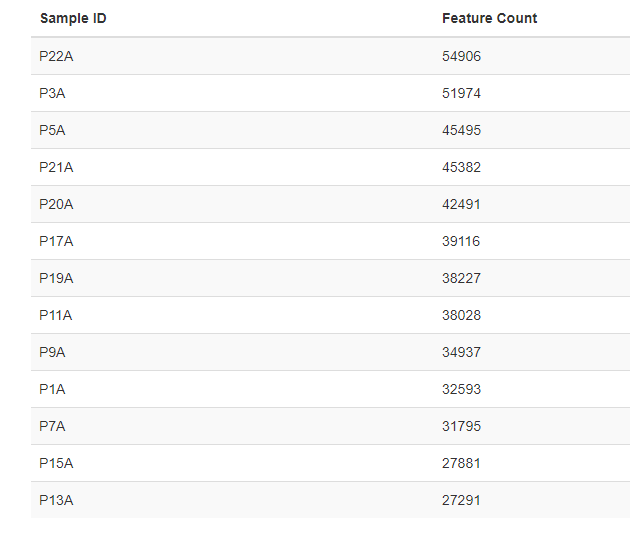

In [6]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [7]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [8]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/ba_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [9]:
# set sampling_depth based on alpha rarefacation curve
depth = 25000
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005478892469909978 and the largest is 1.4056998359189226.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-t3qfy6rj/7788d79c-0eb4-4380-9657-e2b9ceef61d1/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-fzcw2x52

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-t3qfy6rj/7788d79c-0eb4-4380-9657-e2b9ceef61d1/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-7nzkrzp5

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0017128061768185807 and the largest is 0.1592867530993067.
  warn(


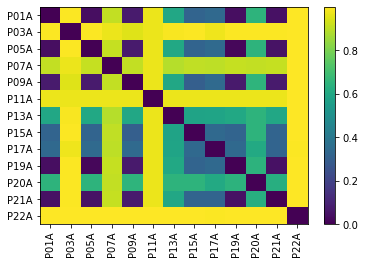

In [10]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

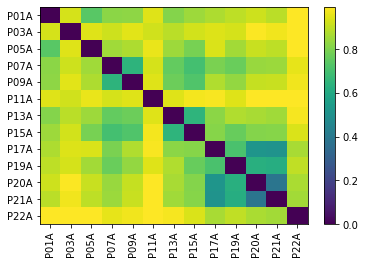

In [11]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [12]:
action_results.jaccard_emperor

<visualization: Visualization uuid: ebf36572-3416-4477-a5c2-8af8ae0a19f5>

In [13]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#     table = denoisetable_ba,
#     phylogeny = rooted_tree,
#     max_depth = depth,
#     metadata = sample_metadata,
#     metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
#     steps =  1000
# )

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar.qzv')
# # load alpha_rarefacion
# qzv_file_alpha = q2.Visualization.load('./results/alpha_rar.qzv')

In [14]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson
Sample ID,,,,,
P01A,29.0,3.239768,29.750000,0.335930,0.072216
P03A,81.0,10.404936,81.000000,4.173635,0.875966
P05A,19.0,2.015762,19.750000,0.122329,0.023657
P07A,51.0,6.135077,53.000000,2.275507,0.708031
P09A,25.0,2.741790,28.000000,0.473625,0.134145
P11A,90.0,11.743523,90.500000,5.270994,0.956505
P13A,72.0,9.091277,72.600000,3.301611,0.797688
P15A,39.0,4.525945,46.500000,1.492090,0.498292
P17A,120.0,16.366503,120.333333,2.729823,0.562191


In [15]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [16]:
# simpson viz
visualizations['simpson']

<visualization: Visualization uuid: 6d436133-1993-4a6c-9157-bb43c3b1d782>

In [17]:
# observed_features viz
visualizations['observed_features']

<visualization: Visualization uuid: 37d87479-d817-42a4-b80f-4736fb0b439f>

In [18]:
# fisher_alpha viz
visualizations['fisher_alpha']

<visualization: Visualization uuid: 833aaf41-73f0-49fd-a3c1-54491dfd6957>

In [19]:
# chao1 viz
visualizations['chao1']

<visualization: Visualization uuid: 21812b07-2b13-4017-a4ea-b63f8cf4de7b>

In [20]:
# shannon viz
visualizations['shannon']

<visualization: Visualization uuid: 1729ecbd-15fa-41bb-b30d-8ee0d2cb0b1f>

In [21]:
# evenness_vector viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.evenness_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 70b3311e-8ab8-4eed-b887-6dd72ee04a65>

In [22]:
# faith_pd viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.faith_pd_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 8b1c2d42-719b-420e-aee5-f1776659f660>

### BETA DIVERSITY

In [23]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [24]:
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [25]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 25000
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005167624033586084 and the largest is 1.3261844915999728.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-73lpxb1h/584edba9-44c5-47e0-a8b9-e3199f65ea2e/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-925gtdar

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-73lpxb1h/584edba9-44c5-47e0-a8b9-e3199f65ea2e/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-k41doz21

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0015866279504305042 and the largest is 0.1544783867504494.
  warn(


In [26]:
depth = 25000
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00018353863288175654 and the largest is 0.8371496437513138.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-pv9idg6s/208be0d9-2581-412d-bedb-1d9840d574cc/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-_ybrqa2m

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-pv9idg6s/208be0d9-2581-412d-bedb-1d9840d574cc/data/feature-table.biom -t /tmp/qiime2-archive-wwt_p3a1/fcf734dd-f6dd-46e8-a916-053f480aac3b/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-uact_rfl

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005705143871861746 and the largest is 0.09498711641106983.
  warn(


#### PERMANOVA

In [27]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: cdafb35c-f61f-431b-9b3f-ac714cb01c2b>

<Figure size 432x288 with 0 Axes>

In [28]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 869d0e69-7432-48ef-b4be-8a3262581278>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [29]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: 972f1c81-871c-43ad-99cc-07a1276890e2>

<Figure size 432x288 with 0 Axes>

In [30]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: aaa0dbc8-eee9-4881-9156-c50e5d9afabe>

<Figure size 432x288 with 0 Axes>